<a href="https://colab.research.google.com/github/AshwinPrksh00/Lazyprogrammer-ComputerVision-Codes/blob/main/3.%20Convolutional%20Neural%20Networks/TF2_0_CIFAR_10_Improved_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing necessary libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Dropout, Dense, Flatten, Input, BatchNormalization, GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.models import Model

In [2]:
#Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

170508288/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000,)


In [3]:
class_num = len(set(y_train))
print('No of classes in dataset:', class_num)

No of classes in dataset: 10


In [4]:
#Building the model
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3,3), activation = 'relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation = 'relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(class_num, activation='softmax')(x)

model = Model(i,x) #using for compile and fit
model1 = Model(i,x) #using for augmented data

In [5]:
#Compile and Train the model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 27s 8ms/step - loss: 1.2738 - accuracy: 0.5583 - val_loss: 1.1738 - val_accuracy: 0.6103
Epoch 2/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8332 - accuracy: 0.7138 - val_loss: 0.7862 - val_accuracy: 0.7219
Epoch 3/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6814 - accuracy: 0.7660 - val_loss: 0.7592 - val_accuracy: 0.7495
Epoch 4/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.5776 - accuracy: 0.8002 - val_loss: 0.7496 - val_accuracy: 0.7554
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4900 - accuracy: 0.8311 - val_loss: 0.6266 - val_accuracy: 0.7979
Epoch 6/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4136 - accuracy: 0.8568 - val_loss: 0.6649 - val_accuracy: 0.7962
Epoch 7/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3506 - accuracy: 0.8790 - val_loss: 0.6752 - val

In [8]:
#Data Augmentation Training
#First compile the model
model1.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0]//batch_size
model1.fit_generator(train_generator, validation_data = (x_test, y_test), steps_per_epoch = steps_per_epoch, epochs = 50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
1562/1562 [==============================] - 34s 21ms/step - loss: 0.5488 - accuracy: 0.8286 - val_loss: 0.5076 - val_accuracy: 0.8427
Epoch 2/50
1562/1562 [==============================] - 36s 23ms/step - loss: 0.4476 - accuracy: 0.8519 - val_loss: 0.4851 - val_accuracy: 0.8437
Epoch 3/50
1562/1562 [==============================] - 31s 20ms/step - loss: 0.4128 - accuracy: 0.8622 - val_loss: 0.4728 - val_accuracy: 0.8472
Epoch 4/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.3954 - accuracy: 0.8682 - val_loss: 0.4538 - val_accuracy: 0.8546
Epoch 5/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.3687 - accuracy: 0.8767 - val_loss: 0.4574 - val_accuracy: 0.8489
Epoch 6/50
1562/1562 [==============================] - 32s 20ms/step - loss: 0.3620 - accuracy: 0.8789 - val_loss: 0.4355 - val_accuracy: 0.8573
Epoch 7/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.3427 - accuracy: 0.8846 - val_loss: 0.4250 -

In [9]:
model.history.history

{'accuracy': [0.5582600235939026,
  0.7138000130653381,
  0.766040027141571,
  0.8001999855041504,
  0.8310800194740295,
  0.8567799925804138,
  0.8790199756622314,
  0.8989999890327454,
  0.9148799777030945,
  0.9238799810409546,
  0.9343600273132324,
  0.9395400285720825,
  0.9476400017738342,
  0.9528599977493286,
  0.9552000164985657,
  0.9603999853134155,
  0.9614999890327454,
  0.9630799889564514,
  0.9658399820327759,
  0.9686999917030334,
  0.9688799977302551,
  0.9723799824714661,
  0.9735599756240845,
  0.9739000201225281,
  0.9747599959373474,
  0.9770799875259399,
  0.9759600162506104,
  0.9786199927330017,
  0.9785799980163574,
  0.9798200130462646,
  0.9784200191497803,
  0.9793599843978882,
  0.9818000197410583,
  0.9815800189971924,
  0.983519971370697,
  0.9832000136375427,
  0.9833999872207642,
  0.9831799864768982,
  0.983299970626831,
  0.9832800030708313,
  0.9847599864006042,
  0.9845200181007385,
  0.9851999878883362,
  0.9848600029945374,
  0.9857199788093567,
 

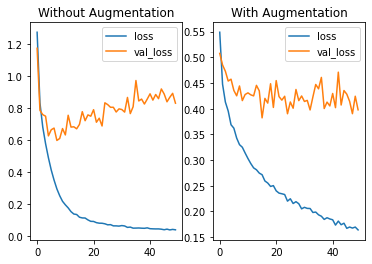

In [14]:
#Plotting the loss per epoch for both model results 

fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(model.history.history['loss'], label='loss')
ax1.plot(model.history.history['val_loss'], label='val_loss')
ax1.title.set_text('Without Augmentation')
ax1.legend()
ax2.plot(model1.history.history['loss'], label='loss')
ax2.plot(model1.history.history['val_loss'], label='val_loss')
ax2.title.set_text('With Augmentation')
ax2.legend()

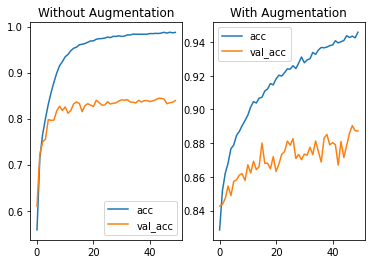

In [15]:
#Plotting the accuracy per epoch for both model results 

fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(model.history.history['accuracy'], label='acc')
ax1.plot(model.history.history['val_accuracy'], label='val_acc')
ax1.title.set_text('Without Augmentation')
ax1.legend()
ax2.plot(model1.history.history['accuracy'], label='acc')
ax2.plot(model1.history.history['val_accuracy'], label='val_acc')
ax2.title.set_text('With Augmentation')
ax2.legend()

In [16]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
import itertools 
def plot_CM(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    print('Normalized Confusion Matrix')
  else:
    print('Confusion Matrix Non-Normalized')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j], fmt), horizontalalignment = 'center', color='white' if cm[i,j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()


Confusion Matrix Non-Normalized
[[896  11  33   5   2   0  12   2  25  14]
 [  3 979   0   0   0   0   2   0   3  13]
 [ 20   3 888  20  22  17  20   6   1   3]
 [ 13   7  51 788  26  76  18  10   2   9]
 [  7   1  54  30 851  13  28  14   1   1]
 [  4   4  34  94  25 806   6  23   0   4]
 [  4   2  35  44   8   7 893   4   2   1]
 [ 10   0  20  16  16  13   4 916   1   4]
 [ 23  14   6   4   2   1   1   3 931  15]
 [  6  47   2   5   1   2   1   1  11 924]]


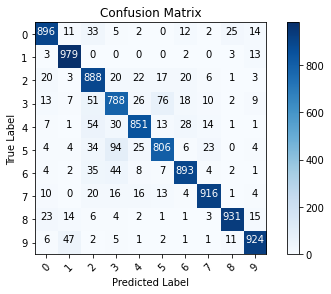

In [17]:
#Plot Confusion Matrix Without Data Augmentation
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_CM(cm, list(range(10)))

In [18]:
# Label mapping
labels = '''airplane automobile bird cat deer dog frog horse ship truck'''.split(" ")

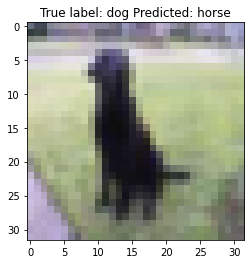

In [19]:
# Show some misclassified examples for model without data augmentation
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

Confusion Matrix Non-Normalized
[[896  11  33   5   2   0  12   2  25  14]
 [  3 979   0   0   0   0   2   0   3  13]
 [ 20   3 888  20  22  17  20   6   1   3]
 [ 13   7  51 788  26  76  18  10   2   9]
 [  7   1  54  30 851  13  28  14   1   1]
 [  4   4  34  94  25 806   6  23   0   4]
 [  4   2  35  44   8   7 893   4   2   1]
 [ 10   0  20  16  16  13   4 916   1   4]
 [ 23  14   6   4   2   1   1   3 931  15]
 [  6  47   2   5   1   2   1   1  11 924]]


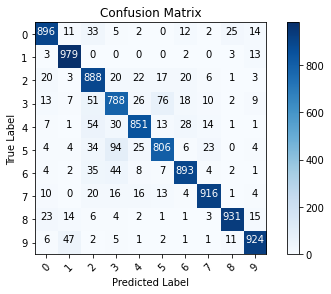

In [20]:
# Plot Confusion Matrix With Data Augmentation
p1_test = model1.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p1_test)
plot_CM(cm, list(range(10)))

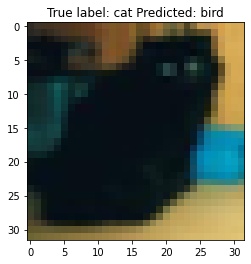

In [21]:
# Show some misclassified examples for model with data augmentation
misclassified_idx = np.where(p1_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p1_test[i]]));